<a href="https://colab.research.google.com/github/yuyunliu33/FashionMNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import tensorflow, keras, matplotlib and numpy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
print(tf.__version__)

1.15.0


In [0]:
# import the fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist
# separate the dataset into two
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # type numpy.ndarray

In [0]:
train_images.shape # 60000 images of 28x28 pixels

(60000, 28, 28)

In [0]:
np.unique(train_labels) # 10 different unique images

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

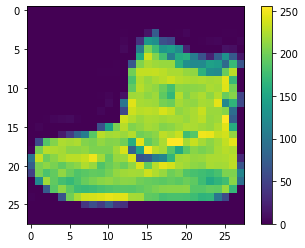

In [0]:
plt.figure()
plt.imshow(train_images[0]) # show the first image of the dataset from train_images
plt.colorbar() # see the colors that the image is made of
plt.show() 

In [0]:
# ************ PREPROCESS THE DATASET *************
# a single image is made of 28x28 pixels of intensity of maximum 256
# individual elements of a single image is from 0-255 (look at color bar from the image above)
# we want 0-255 to be simply from 0-1: / 255 to obtain it

In [0]:
train_images = train_images / 255
test_images = test_images / 255 

In [0]:
# define the names of the labels (10)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

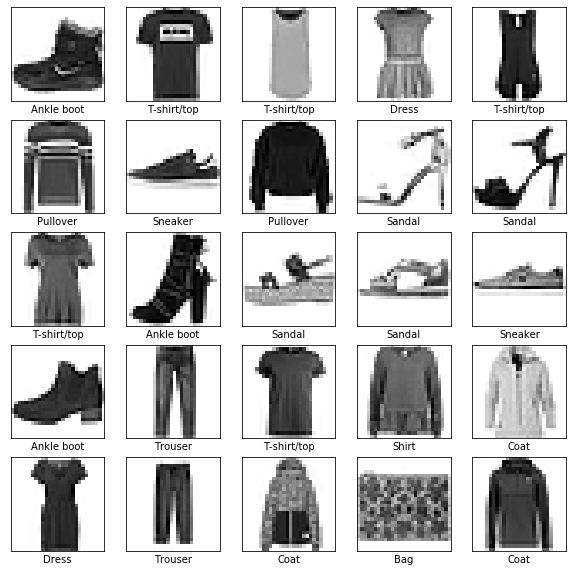

In [0]:
# subplot
plt.figure(figsize = (10, 10)) # figsize is size of the whole figure
for i in range(25): # we want to display a figure of 5 images by 5 images
    plt.subplot(5, 5, i+1) # (width, height, index) of subplot i != 0 
    plt.xticks([]) # disable xticks: ticks are values used to show specific points on the coordinate axis
    plt.yticks([])
    plt.grid(False) # remove grid lines
    plt.imshow(train_images[i], cmap = plt.cm.binary) # display an image: imshow(array_like or PIL_image, colormap)
    plt.xlabel(class_names[train_labels[i]]) # train_labels are arrays of int from 0-9 representing a clothing item
plt.show() # display first 25 images from train_labels dataset    

In [0]:
# ************ SET UP THE LAYERS **************
# input layer: flatten the two-dimensional array (28x28) into one-dimensional array (784)
# hidden layer: dense fully connected layer (relu)
# output layer: dense fully connected layer of 10 nodes (softmax)

# a model is used to make predictions 
# use keras to build the model: set and specify the layers
# an activation function's main purpose: convert an input signal of a node in a A-NN to an output signal
# relu means replified linear unit; very effective activation function 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
# *********** COMPILE AND OPTIMIZE THE MODEL *************
# to do this we need to understand three things:
#1. Loss function: measures how accurate the output is (i.e. capture the differences between the real output and the actual output). Moreover, it is what is used to propagate back into the model to be able to update it (backprogation).
#2. Optimizer: measures how the model is updated (i.e. onto what extent the model is updated during backpropagation).
#3. Metrics: monitors the training to determine when to stop (trains the model until it becomes optimal i.e. predictions are good enough)

# compile the model: need to specify the optimizer, loss function and metrics
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [0]:
# ************ TRAINING THE MODEL **************
# train the model in 10 epochs (number of iterations); that is a complete presentation of the training dataset
# it means that we would feed in 60000 images and labels into the network (model we created) 10 different time (10 epochs)
# for each epoch we would see both the loss and the accuracy of the model

model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5006 - acc: 0.8248
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3799 - acc: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3398 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3126 - acc: 0.8864
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2948 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2793 - acc: 0.8970
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2672 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2542 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2467 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
# ************** MAKE A PREDICTION ***************
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3266 - acc: 0.8851


In [0]:
predictions = model.predict(test_images) # returns the learned label for each object in the array

In [0]:
predictions

array([[7.3433307e-06, 7.1269092e-06, 9.3413215e-09, ..., 6.6105453e-03,
        7.8578779e-08, 9.9215090e-01],
       [6.5015571e-05, 2.1174287e-10, 9.9739385e-01, ..., 2.1691794e-15,
        6.3590870e-09, 2.3948551e-12],
       [6.2514823e-07, 9.9999940e-01, 2.2576735e-10, ..., 1.3834248e-21,
        3.7674768e-12, 1.0462494e-14],
       ...,
       [1.1454090e-06, 9.4840889e-13, 5.7511934e-06, ..., 1.2728216e-10,
        9.9995017e-01, 4.0026454e-14],
       [2.4844556e-07, 9.9999046e-01, 3.0378512e-08, ..., 7.1587828e-15,
        7.6783717e-09, 2.5228108e-10],
       [5.0188166e-05, 1.2004019e-06, 2.7249853e-05, ..., 1.8359759e-03,
        3.6631481e-04, 3.1252603e-05]], dtype=float32)

In [0]:
predictions.shape # get 10000 predictions that was made each have 10 items of predictions

(10000, 10)

In [0]:
# a prediction is an array of 10 numbers: each number represents the confidence (probability) that the image (element of predictions) corresponds to each of the 10 different classes of clothing
# model is predicting a 97% probability/chance that the element is the last item from the clothing class e.g. ankle boot
predictions[0] # 10 different items for predictions[0] 

array([7.3433307e-06, 7.1269092e-06, 9.3413215e-09, 1.8363165e-09,
       1.3020480e-07, 1.2229463e-03, 9.1903087e-07, 6.6105453e-03,
       7.8578779e-08, 9.9215090e-01], dtype=float32)

<function matplotlib.pyplot.show>

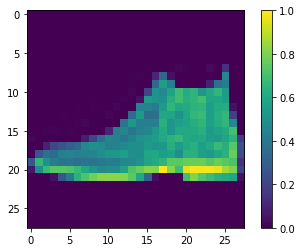

In [0]:
# let's see if the model made a good prediction i.e. if the first element (ankle boot) from predictions is the same element from the the test_images (ankle boot too?)
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show

In [0]:
# ************ EVALUATE THE PREDICTION RESULT (1) **************

# function to plot an image 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary) # black and white image

  predicted_label = np.argmax(predictions_array) # returns the index of the maximum value of an array from predictions_array e.g. returns the label (int associated to item from class of clothing)
  # test the accuracy of our model and put it visually
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

In [0]:
# function to create bar plot of the predictions
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array) # index of max probability

  thisplot[predicted_label].set_color('red') # predicted_label is int
  thisplot[true_label].set_color('green')

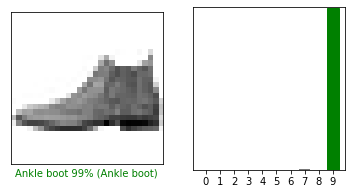

In [0]:
i = 8
plt.figure(figsize = (6, 3))
# plot two things: image and bar plot
plt.subplot(1,2,1) # figure 1 by 2 images with index 1

# plot the image with index i, image at predictions[i] 
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2) # figure 1 by 2 images with index at 2
plot_value_array(i, predictions[i], test_labels)

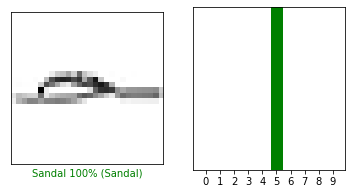

In [0]:
i = 8
plt.figure(figsize = (6, 3))
# plot two things: image and bar plot
plt.subplot(1,2,1) # figure 1 by 2 images with index 1

# plot the image with index i, image at predictions[i] 
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2) # figure 1 by 2 images with index at 2
plot_value_array(i, predictions[i], test_labels)

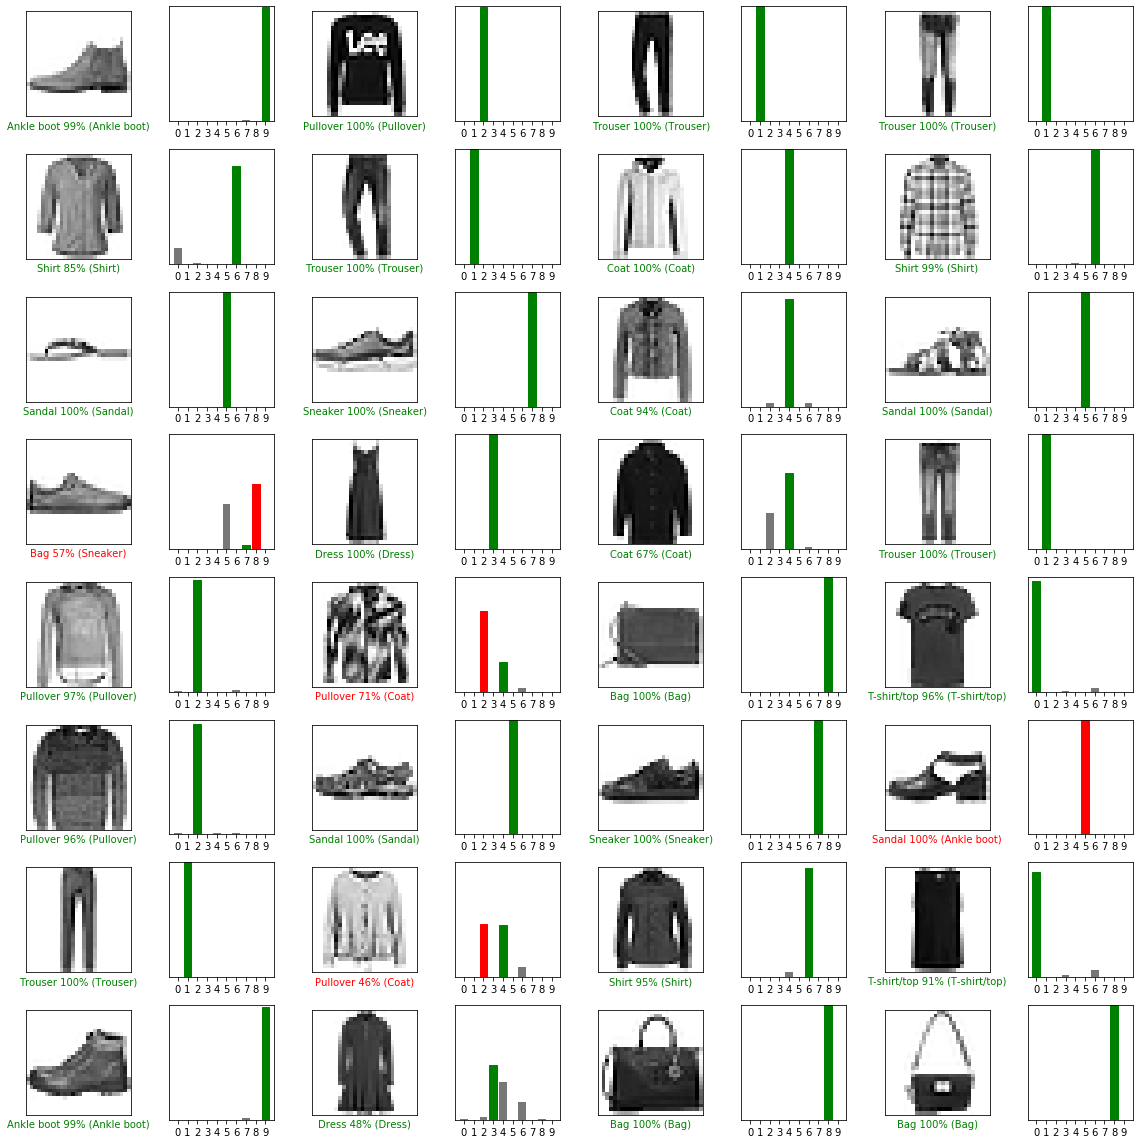

In [0]:
# *********** EVALUATE THE PREDICTIONS RESULT (2) *************

rows = 8 
cols = 4

num_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))

for i in range(num_images):
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()